In [23]:
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(viridis)))
library('gridExtra')
suppressWarnings(suppressMessages(library(cowplot)))

In [24]:
df1 <- read.table("../../reports/Master Table/RESULTS_FDR_LASTLEVELONLY",header=TRUE)

Warning message in file(file, "rt"):
"cannot open file '../../reports/Master Table/RESULTS_FDR_LASTLEVELONLY': No such file or directory"


ERROR: Error in file(file, "rt"): cannot open the connection


In [4]:
head(df1,2)

,strain,condition,slevel,locus_tag,Annotation_TC,Median_TC,controlMedian_TC,fdr_TC,Effect_TC,Annotation_UC,Median_UC,controlMedian_UC,fdr_UC,Effect_UC
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,DCLPA,canavanine,HIGH,CCNA_00001,Essential,0,0.0,NA,NA,Essential,0,0.0,NA,NA
2,DCLPA,canavanine,HIGH,CCNA_00002,Conditionally_Neutral,7603,5948.5,1,0.2099038,Conditionally_Neutral,42,50.5,1,-0.1784765


In [5]:
data <- df1%>%group_by(strain,condition,slevel,Annotation_UC)%>%mutate(value = n())%>%select(strain,condition,slevel,value)%>%distinct(,.keep_all= TRUE)%>%unite(individual, c(condition,slevel), sep = ":", remove =TRUE)%>%
rename(group=strain,observation=Annotation_UC)%>%select(individual,group,observation,value)%>%filter(observation!="Conditionally_Neutral")%>%
filter(observation!="Essential")%>%
mutate(group=factor(group))

Adding missing grouping variables: `Annotation_UC`


In [6]:
#write.table(data,"../../reports/Master Table/TC_class_2.txt",quote=FALSE,sep="\t")

In [25]:
data <- read.table("../../reports/Master Table/TC_class_1.txt",header=TRUE)
data$group <- gsub("D_","\u394",data$group)
data <- data%>%mutate(group=factor(group))

In [26]:

 
# Get the name and the y position of each label
label_data <- data %>% group_by(id, individual) %>% summarize(tot=sum(value))
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust <- ifelse( angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)
 
# prepare a data frame for base lines
base_data <- data %>% 
  group_by(group) %>% 
  summarize(start=min(id), end=max(id) ) %>% 
  rowwise() %>% 
  mutate(title=mean(c(start, end)))
 
# prepare a data frame for grid (scales)
grid_data <- base_data
grid_data$end <- grid_data$end[ c( nrow(grid_data), 1:nrow(grid_data)-1)] + 1
grid_data$start <- grid_data$start - 1
grid_data <- grid_data[-1,]
 

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.


In [27]:
label_data

id,individual,tot,hjust,angle
<int>,<chr>,<int>,<dbl>,<dbl>
1,CN:L,517,0,86.4
2,CN:M,488,0,79.2
3,CN:H,604,0,72.0
4,HT:L,496,0,64.8
5,HT:M,566,0,57.6
6,HT:H,554,0,50.4
7,OS:L,518,0,43.2
8,OS:M,457,0,36.0
9,OS:H,478,0,28.8


Warning message:
"Removed 5 rows containing missing values (position_stack)."


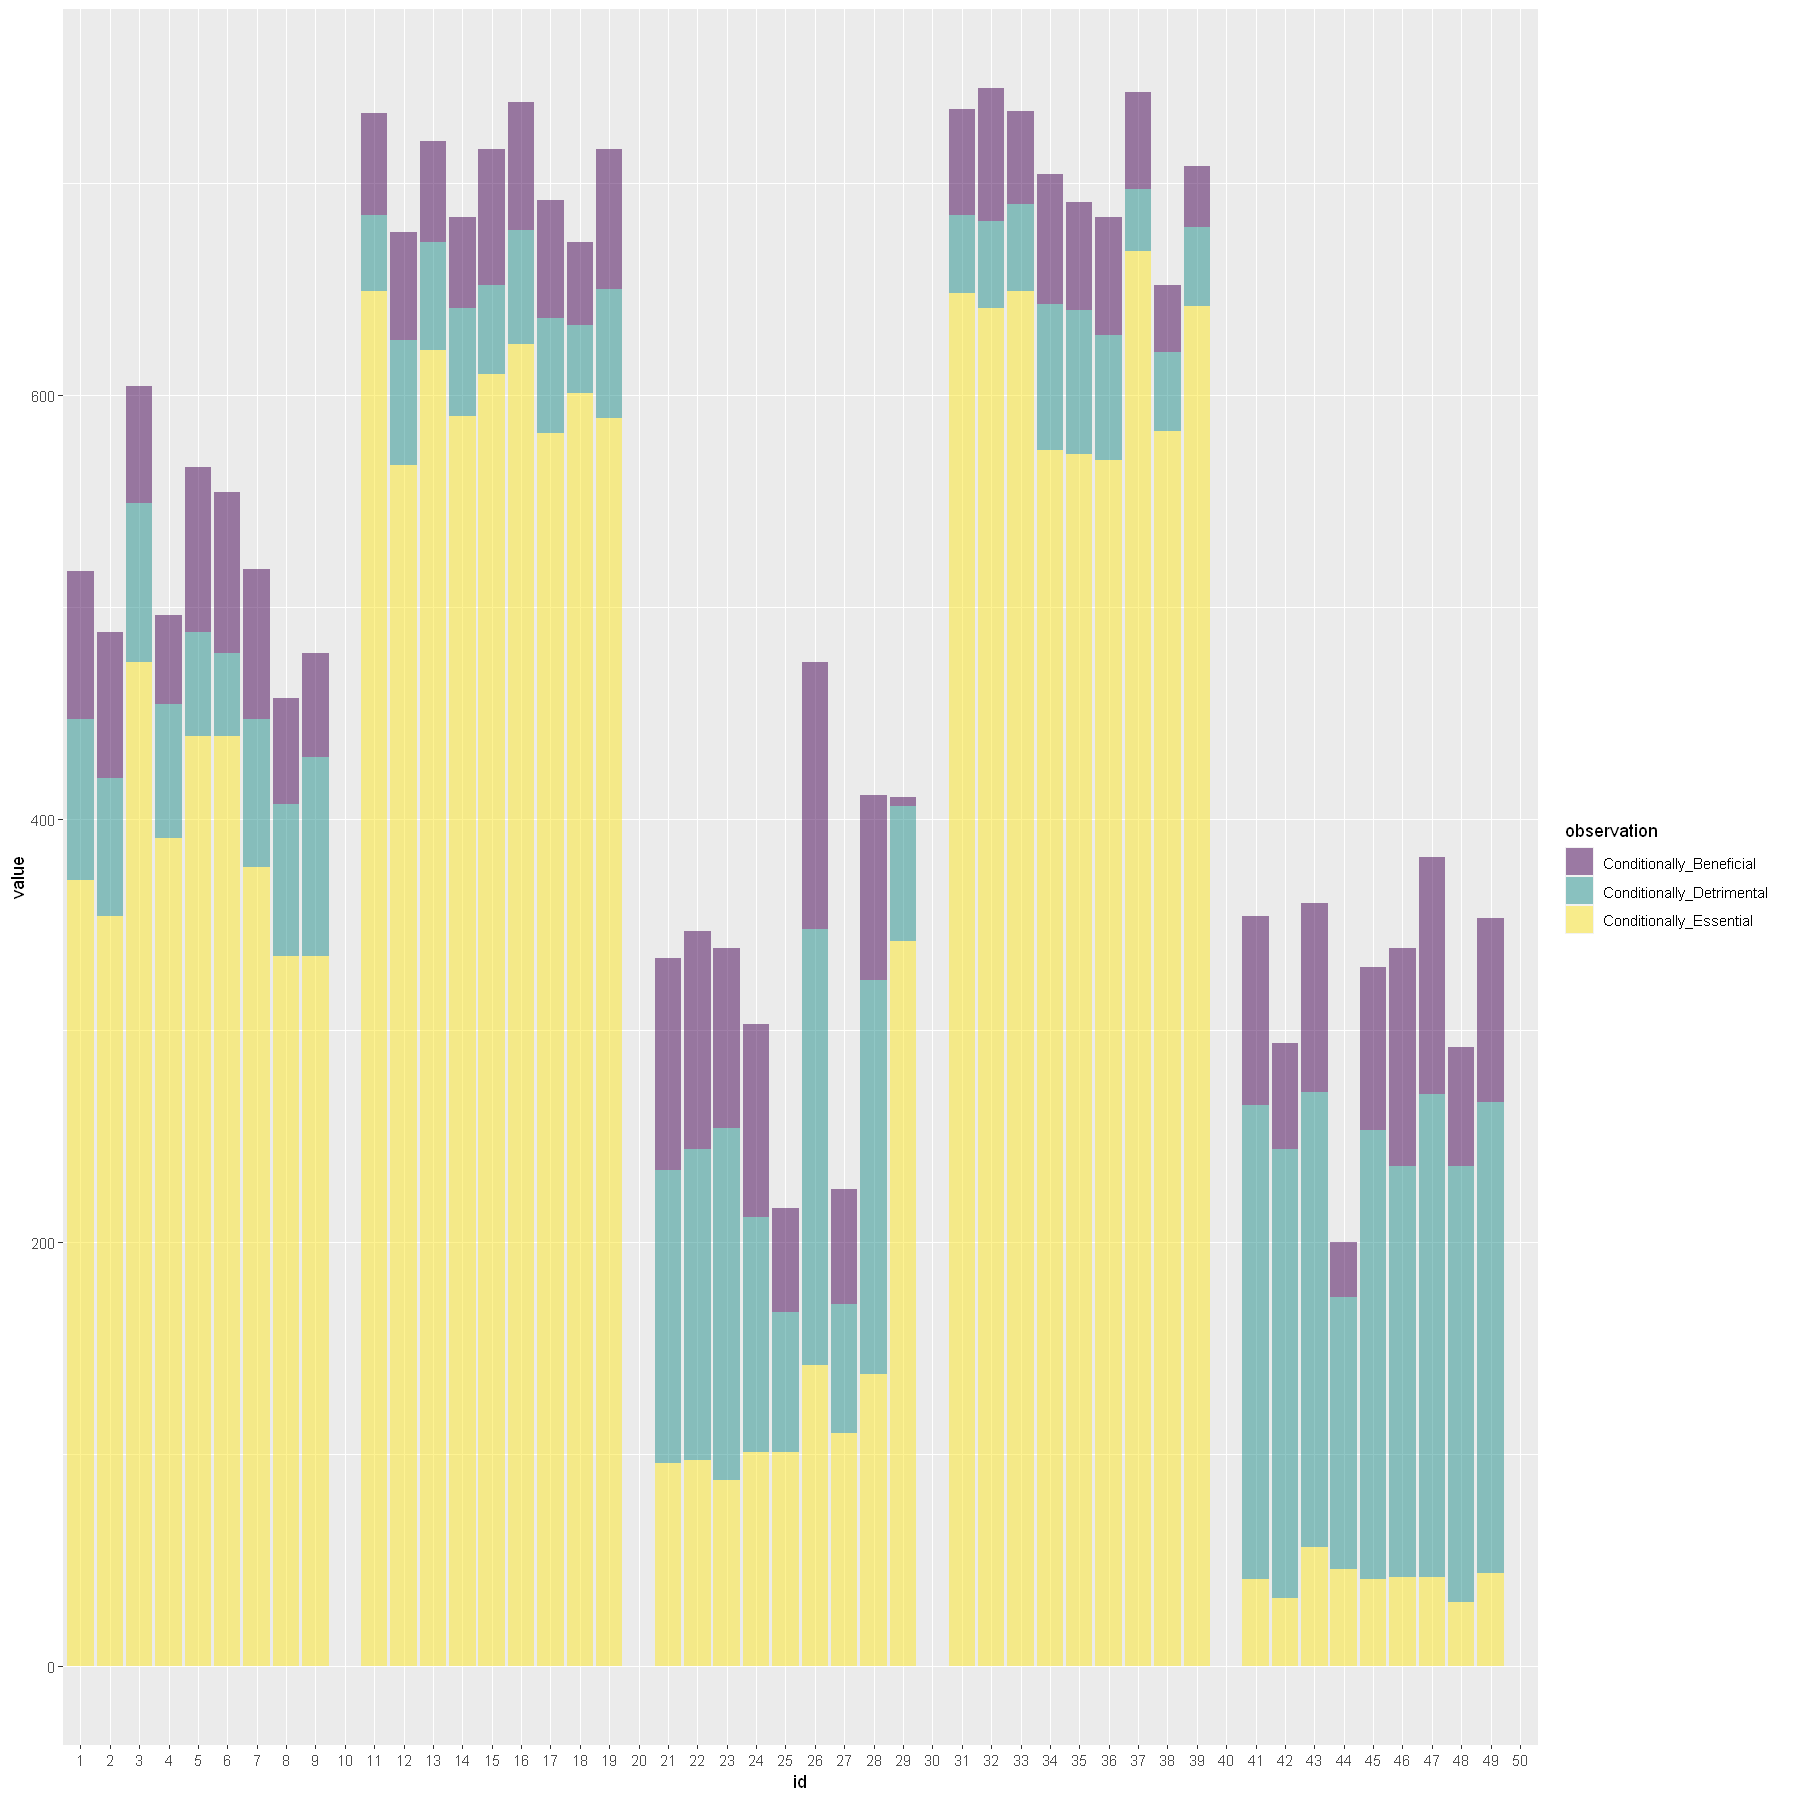

In [39]:
ggplot(data) +      
  
  # Add the stacked bar
  geom_bar(aes(x=id, y=value, fill=observation), stat="identity", alpha=0.5) +
  scale_fill_viridis(discrete=TRUE)

In [28]:
data $id <- factor(data$id,level=c(rep(1:50)))

In [37]:
 options(repr.plot.width=15, repr.plot.height=15)
p<- ggplot(data) +      
  
  # Add the stacked bar
  geom_bar(aes(x=id, y=value, fill=observation), stat="identity", alpha=0.5) +
  scale_fill_viridis(discrete=TRUE) +
  



  ylim(-350,max(label_data$tot, na.rm=T)) +
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank()
  ) +
  coord_polar()+
geom_text(data=label_data, aes(x=id, y=tot+10, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=5, angle= label_data$angle, inherit.aes = FALSE )+
geom_segment(data=base_data, aes(x = start, y = -5, xend = end, yend = -5), colour = "black", alpha=0.8, size=0.6 , inherit.aes = FALSE )  +
geom_text(data=base_data, aes(x = title, y = -18, label=group), hjust=c(1,1,0,0,0), colour = "black", alpha=0.8, size=4, fontface="bold", inherit.aes = FALSE)

Warning message:
"Removed 5 rows containing missing values (position_stack)."
Warning message:
"Removed 8 rows containing missing values (geom_text)."


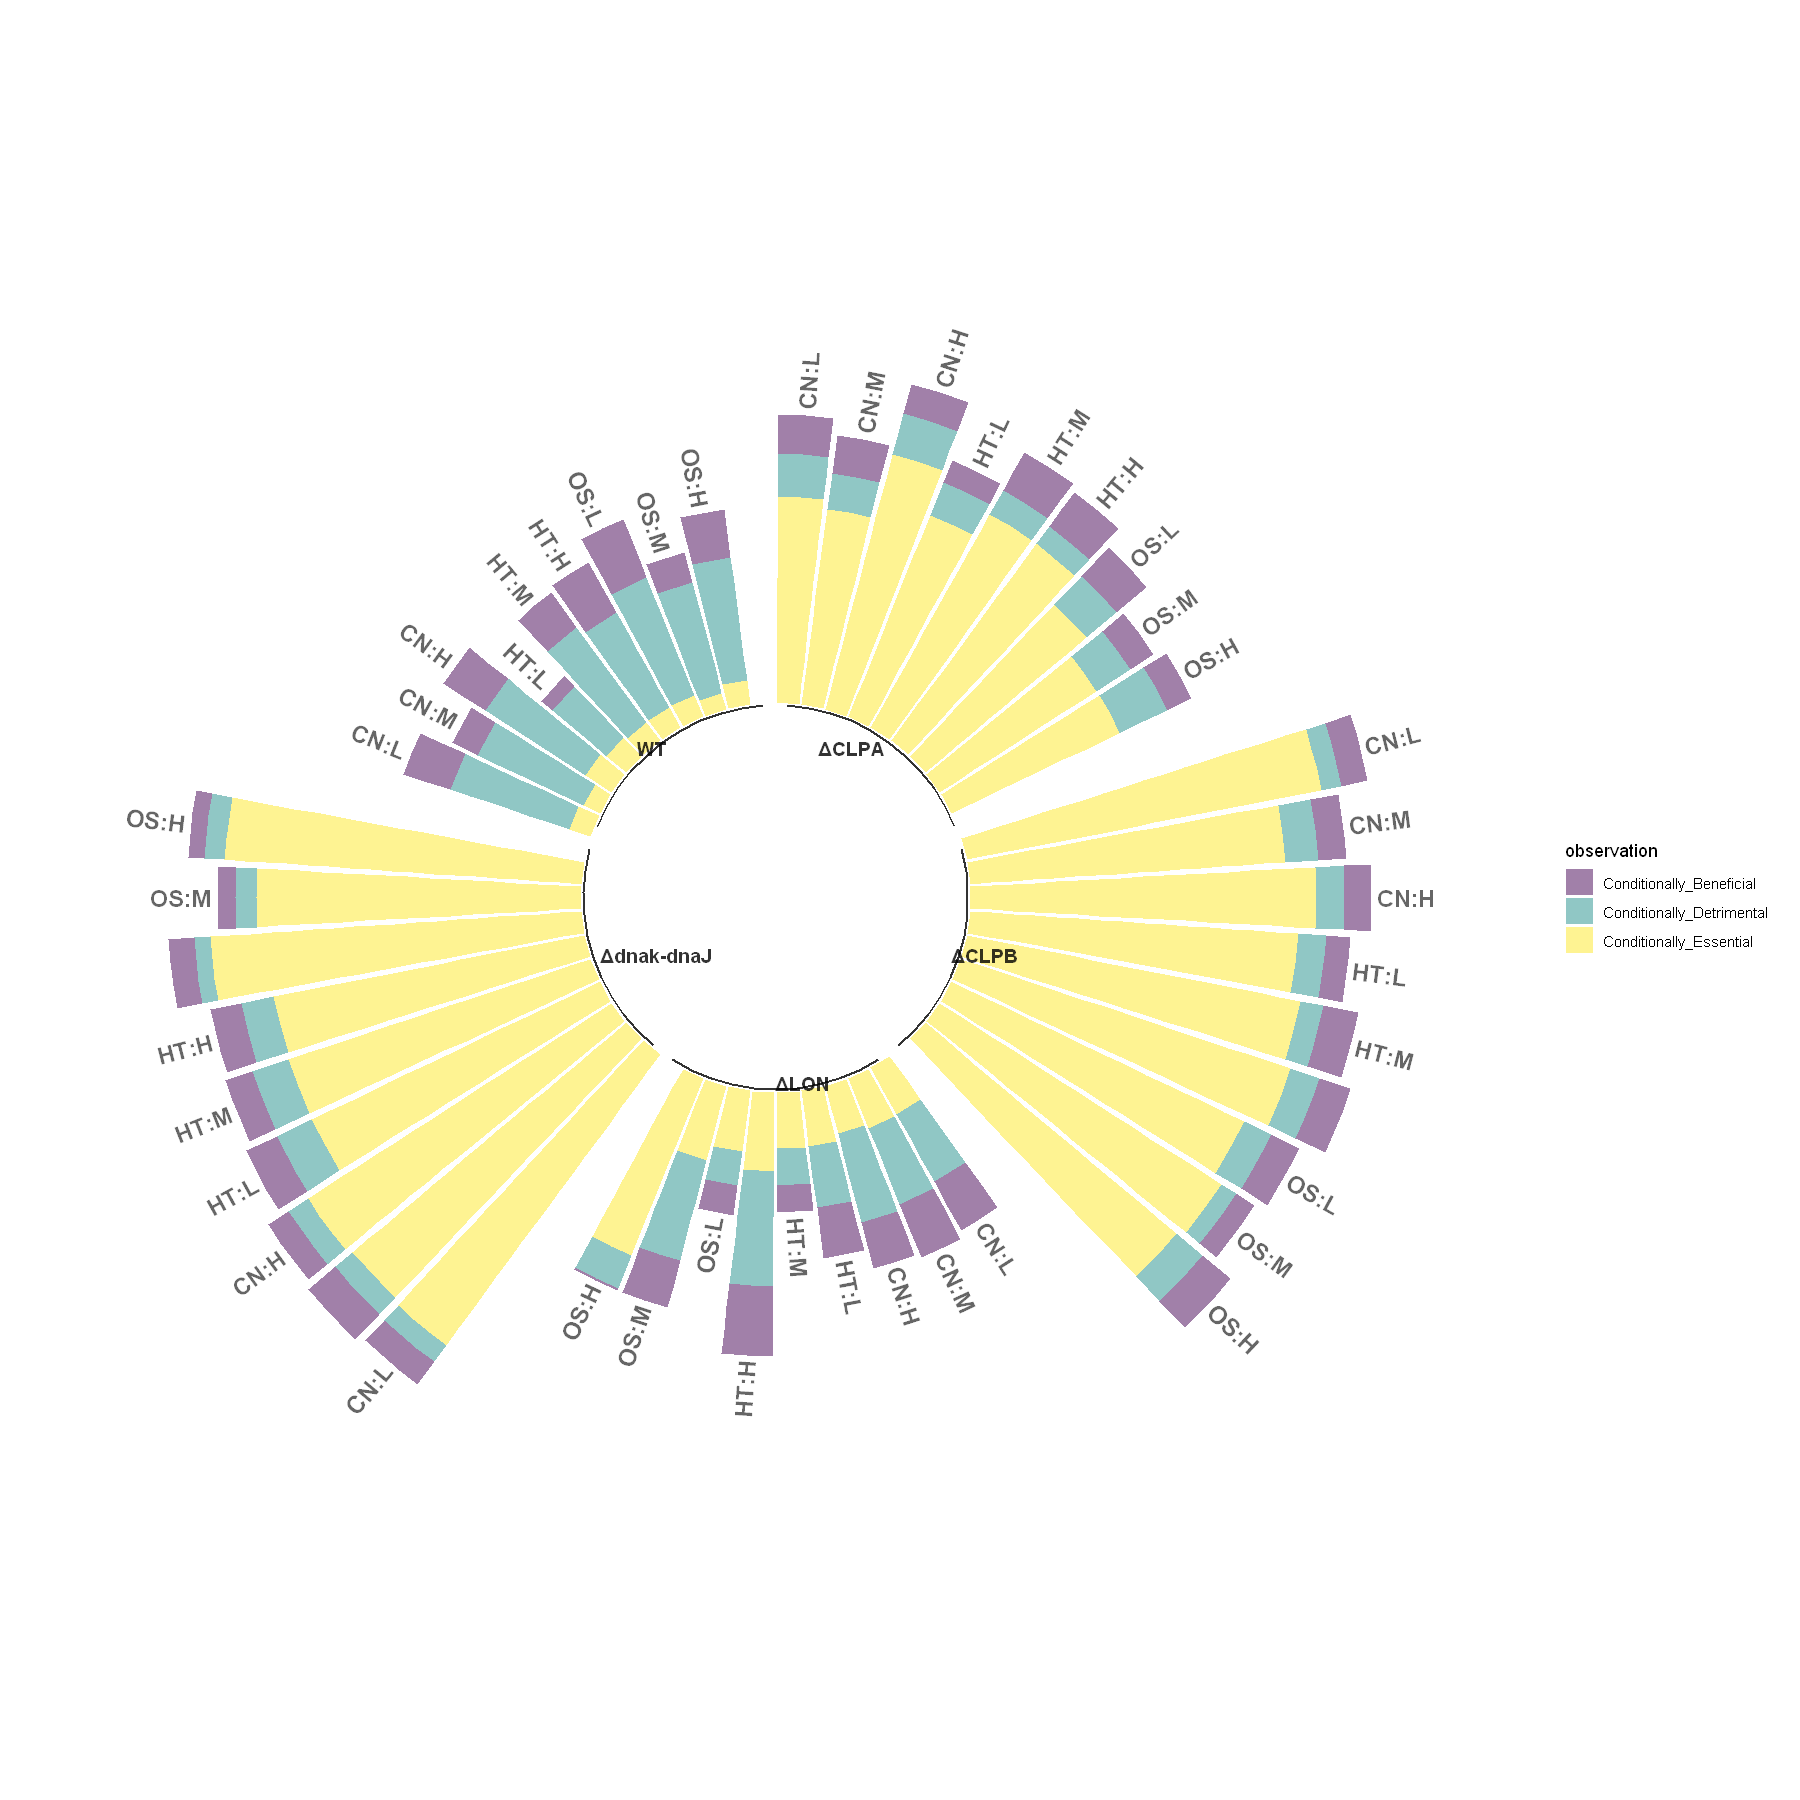

In [38]:
p

In [22]:
ggsave(filename = "../../reports/HORSHOE_LFSR/Fig2f.pdf", device = "pdf",  plot = p, width = 15 ,height =15 , dpi = 1200, units = "in")

Warning message:
"Removed 5 rows containing missing values (position_stack)."
Warning message:
"Removed 6 rows containing missing values (geom_text)."
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'ΔCLPA' in 'mbcsToSbcs': dot substituted for <ce>"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'ΔCLPA' in 'mbcsToSbcs': dot substituted for <94>"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'ΔCLPA' in 'mbcsToSbcs': dot substituted for <ce>"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'ΔCLPA' in 'mbcsToSbcs': dot substituted for <94>"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'ΔCLPB' in 'mbcsToSbcs': dot substituted for <ce>"
Warning message in grid.Call.graphics(C_text, as.graph

In [71]:
## unique counts

In [72]:
data <- df1%>%group_by(strain,condition,slevel,Annotation_TC)%>%mutate(value = n())%>%select(strain,condition,slevel,value)%>%distinct(,.keep_all= TRUE)%>%unite(individual, c(condition,slevel), sep = ":", remove =TRUE)%>%
rename(group=strain,observation=Annotation_TC)%>%select(individual,group,observation,value)%>%filter(observation!="Conditionally_Neutral")%>%mutate(group=factor(group))

Adding missing grouping variables: `Annotation_TC`


In [73]:
#write.table(data,"../../reports/Master Table/UC_class.txt",quote=FALSE,sep="\t")

In [74]:
data <- read.table("../../reports/Master Table/UC_class.txt",header=TRUE)
data$group <- gsub("D_","\u394",data$group)
data <- data%>%mutate(group=factor(group))

In [75]:
 
# Get the name and the y position of each label
label_data <- data %>% group_by(id, individual) %>% summarize(tot=sum(value))
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust <- ifelse( angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)
 
# prepare a data frame for base lines
base_data <- data %>% 
  group_by(group) %>% 
  summarize(start=min(id), end=max(id) ) %>% 
  rowwise() %>% 
  mutate(title=mean(c(start, end)))
 
# prepare a data frame for grid (scales)
grid_data <- base_data
grid_data$end <- grid_data$end[ c( nrow(grid_data), 1:nrow(grid_data)-1)] + 1
grid_data$start <- grid_data$start - 1
grid_data <- grid_data[-1,]
 

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.


In [76]:
data $id <- factor(data$id,level=c(rep(1:50)))

In [77]:
 options(repr.plot.width=10, repr.plot.height=10)
p<- ggplot(data) +      
  
  # Add the stacked bar
  geom_bar(aes(x=id, y=value, fill=observation), stat="identity", alpha=0.5) +
  scale_fill_viridis(discrete=TRUE) +
  



  ylim(-350,max(label_data$tot, na.rm=T)) +
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank()
  ) +
  coord_polar()+
geom_text(data=label_data, aes(x=id, y=tot+10, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=5, angle= label_data$angle, inherit.aes = FALSE )+
geom_segment(data=base_data, aes(x = start, y = -5, xend = end, yend = -5), colour = "black", alpha=0.8, size=0.6 , inherit.aes = FALSE )  +
geom_text(data=base_data, aes(x = title, y = -18, label=group), hjust=c(1,1,0,0,0), colour = "black", alpha=0.8, size=4, fontface="bold", inherit.aes = FALSE)

In [79]:
ggsave(filename = "../../reports/HORSHOE_LFSR/Fig2b", device = "pdf",  plot = p, width = 15 ,height =15 , dpi = 1200, units = "in")

Warning message:
"Removed 5 rows containing missing values (position_stack)."
Warning message:
"Removed 8 rows containing missing values (geom_text)."
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'ΔCLPA' in 'mbcsToSbcs': dot substituted for <ce>"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'ΔCLPA' in 'mbcsToSbcs': dot substituted for <94>"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'ΔCLPA' in 'mbcsToSbcs': dot substituted for <ce>"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'ΔCLPA' in 'mbcsToSbcs': dot substituted for <94>"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'ΔCLPB' in 'mbcsToSbcs': dot substituted for <ce>"
Warning message in grid.Call.graphics(C_text, as.graph